REDO With new examples from spreadsheet

In [ ]:
# Set up
%store -r
%pylab inline
"""
Here i want to look at TF of interest individually 
Plot motif enrichment for eSTRs and causal at TFs
"""
# Libraries
from collections import defaultdict
from matplotlib import gridspec
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import scipy.stats as ss
import seaborn.apionly as sns

#variables
SHORTEN
COLORS
TISSUES
#
#TISSUES = sorted([item for item in list(SHORTEN.keys()) if item not in['LCL','permuted']])
MERGEFILE = '/storage/szfeupe/Runs/650GTEx_estr/Analysis_by_Tissue/Merged_Best_causality.Table'
REGRSSION = '/storage/szfeupe/Runs/650GTEx_estr/Analysis_by_Tissue/LR_SummaryTest_Table.tsv'
OUTDIR = "/storage/szfeupe/Runs/650GTEx_estr/Analysis_by_Tissue/"
TFs = '/storage/mgymrek/gtex/tfbs/encodedata/'

In [2]:
#TODO  modify or rewrite to use sns.swarmplot
def plotthat(Frame, BASEDIR):
    chs = list(Frame['chrom'])[0]
    gene = list(Frame['gene'])[0]
    start = list(Frame['best.str.start'])[0]
    tissue = list(Frame['best.tissue'])[0]
    score = list(Frame['best.score'])[0]
    
    snps=pd.read_csv(BASEDIR+tissue+"/SNP_Analysis/PQValues", sep="\t",low_memory=False)
    expr = pd.read_csv(BASEDIR+tissue+"/Corr_Expr.csv",sep=',' ,low_memory=False) 
    snp =pd.read_csv(SNPS+"/"+chs+".tab", sep='\t',low_memory=False) #snps
    Genos=pd.read_csv(STRS, sep='\t',low_memory=False)
    #gene name
    S = snps.loc[snps['gene']==gene]['str.start']; S=int(S)
    Gene = Gene_table.loc[Gene_table['gene']==gene]['gene.name'].values[0]
    print('\n----->',chs,' gene ',gene,'(',Gene,')  Causality Score: ',score,'\nCounts by SNP genotypes')
    
    #restrict to samples
    samples = list(expr.index)
    Genosnp = snp.loc[snp['start']==S,samples]
    Genostr = Genos.loc[Genos['start']==start, samples]
    Genosnp = Genosnp.replace('None', np.nan) ; #print(Genosnp)
    Genostr = Genostr.replace('None', np.nan) ; #print(Genostr)
    #Expression
    Expr = expr[gene]
    
    #Figure    (1) STR vs EXPR
    plt.figure(figsize=(10,3))
    plt.subplot(131)
    plt.title(tissue+' tissue')
    plt.scatter(Genosnp, Expr, label='Lead SNP', color='b',marker='.')
    plt.ylabel(Gene+' expression')
    plt.xlabel('Best SNP genotypes')
    plt.subplot(132)
    plt.scatter(Genostr, Expr,label='eSTR', color='g',marker='.', s=10)
    #plt.ylabel(Gene+' Gene expression')
    plt.xlabel('eSTR genotypes \nSTR_'+str(int(start)))

    #Figure (2) Hold snp genotypes constant
    geno=list(set(Genosnp.values.tolist()[0]))
    geno=list(set([x for x in np.nan_to_num(geno) if x!='nan']))
    n=len(geno) ; N=0
    ind=Genosnp.index[0]
    #fig = plt.figure(figsize=(8,6))
    plt.subplot(133) #
    for i in range(n):
        S = Genosnp.T.loc[Genosnp.T[ind]==geno[i]]
        sample=list(S.index)
        S['Exp']=Expr.loc[sample]
        S['Str']=Genostr.T.loc[sample][Genostr.index[0]]
        #print(N, list(S['Str']))
        S['Str'] = S['Str'].astype(float)
        S['Str']+=N
        if len(S['Exp'])==0:
            continue
        #ax = fig.add_subplot(n,1,1+i)
        print(geno[i], S.shape)
        plt.scatter(list(S['Str']), list(S['Exp']), color=COLOR[i], marker='.',s=8)
#        plt.title.set_text(Gene+' Expression @ SNP_genotype='+str(geno[i])+' ( n='+str(len(S['Exp']))+' )')
        if max(list(S['Str'].values))-min(list(S['Str'].values))!=0:
            N += max(list(S['Str'].values))-min(list(S['Str'].values))+25
        else:
            N +=max(list(S['Str'].values))+25
        #print(N, list(S['Str']))
    plt.title('STRs at SNPs genotypes \nSTR_'+str(int(start)))
    plt.xticks([])
    plt.show()
#END    

In [7]:
#Litterature examples
genes = ["ENSG00000115129.9","ENSG00000018280.12","ENSG00000146648.11","ENSG00000164692.13","ENSG00000149948.9","ENSG00000111537.4","ENSG00000007171.12","ENSG00000100985.7","ENSG00000100292.12","ENSG00000240972.1","ENSG00000241635.3"]





/usr/lib/python3.4/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


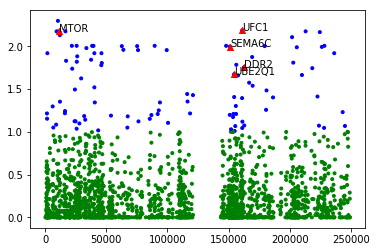

In [3]:
#Chromosome1 STRs most causal eSTRs in best tissues

chr1 = DATA1.loc[DATA1['chrom']=='chr1']
#chr1['text']=['' if (list(chr1['best.q'])[i]<=0.1 and list(chr1['best.score'])[i]>0.5)  else list(chr1['gene.name'])[i] for i in range(chr1.shape[0])] 
chr1['text'] = chr1['gene.name'].where((chr1['best.q']<=0.1) & (chr1['best.score']>0.5),'')

X = [float(x)/1000 for x in list(chr1['best.str.start'])]
Y = [-np.log10(x) for x in list(chr1['best.q'])]
text = list(chr1['text'])
col = ['b' if x>-np.log10(0.1) else 'g' for x in Y ]
#col0 = [col[i] if list(chr1['gene.name'])[i] not in list(chr1['text']) else 'r' for x in range(len(col))]
plt.scatter(X,Y,marker='.', c=col)
plt.scatter
#Annotate
for i, txt in enumerate(text):
    plt.annotate(txt, (X[i],Y[i]))

S = chr1.loc[(chr1['best.q']<=0.1) & (chr1['best.score']>0.5)]
plt.scatter(S['best.str.start']/1000, -np.log10(S['best.q']), marker='^', c='r')
plt.show()
